## Analysis of TIC170729775 Spectra

In this step, we will plot all available data for the Star. Please check if the provided targetname and spectra directory are correct.

In [1]:
star_name = 'TIC170729775'
directory_name = '/home/aaron/Desktop/ZASPE/Spectra'
    

In [2]:

from funcs import collect_fits_files
import numpy as np

#collect all fits files in the given directory
fits_files = collect_fits_files(directory_name)
    

In [ ]:

from funcs import plot_arrays, query_tic_name, extract_target_info
import matplotlib.pyplot as plt
from astropy.io import fits 
from tqdm.notebook import tqdm
from time import sleep

for i in tqdm(range(len(fits_files))): 
    spectrum = fits.getdata(fits_files[i])
    flux = spectrum[3,:] #CERES pipeline blaze corrected flux
    wavelength = spectrum[0,:]
    string = fits_files[i] 
    cut_string = string.split("/")[-1][:38] + ".png"
    
    target_name, observed_night = extract_target_info(fits_files[i])
   
    if target_name.startswith("TIC") == False:
        target_name = query_tic_name(target_name)
      
    
    file_name = target_name + observed_night + ".png"
    
    
    
    save_dir = "/home/aaron/Desktop/Second_Earth_Target_Selection/Code/ZASPE/Plots/" + target_name
    plot_arrays(flux,wavelength,save_dir=save_dir, save_filename=file_name)
    
    sleep(3)
    

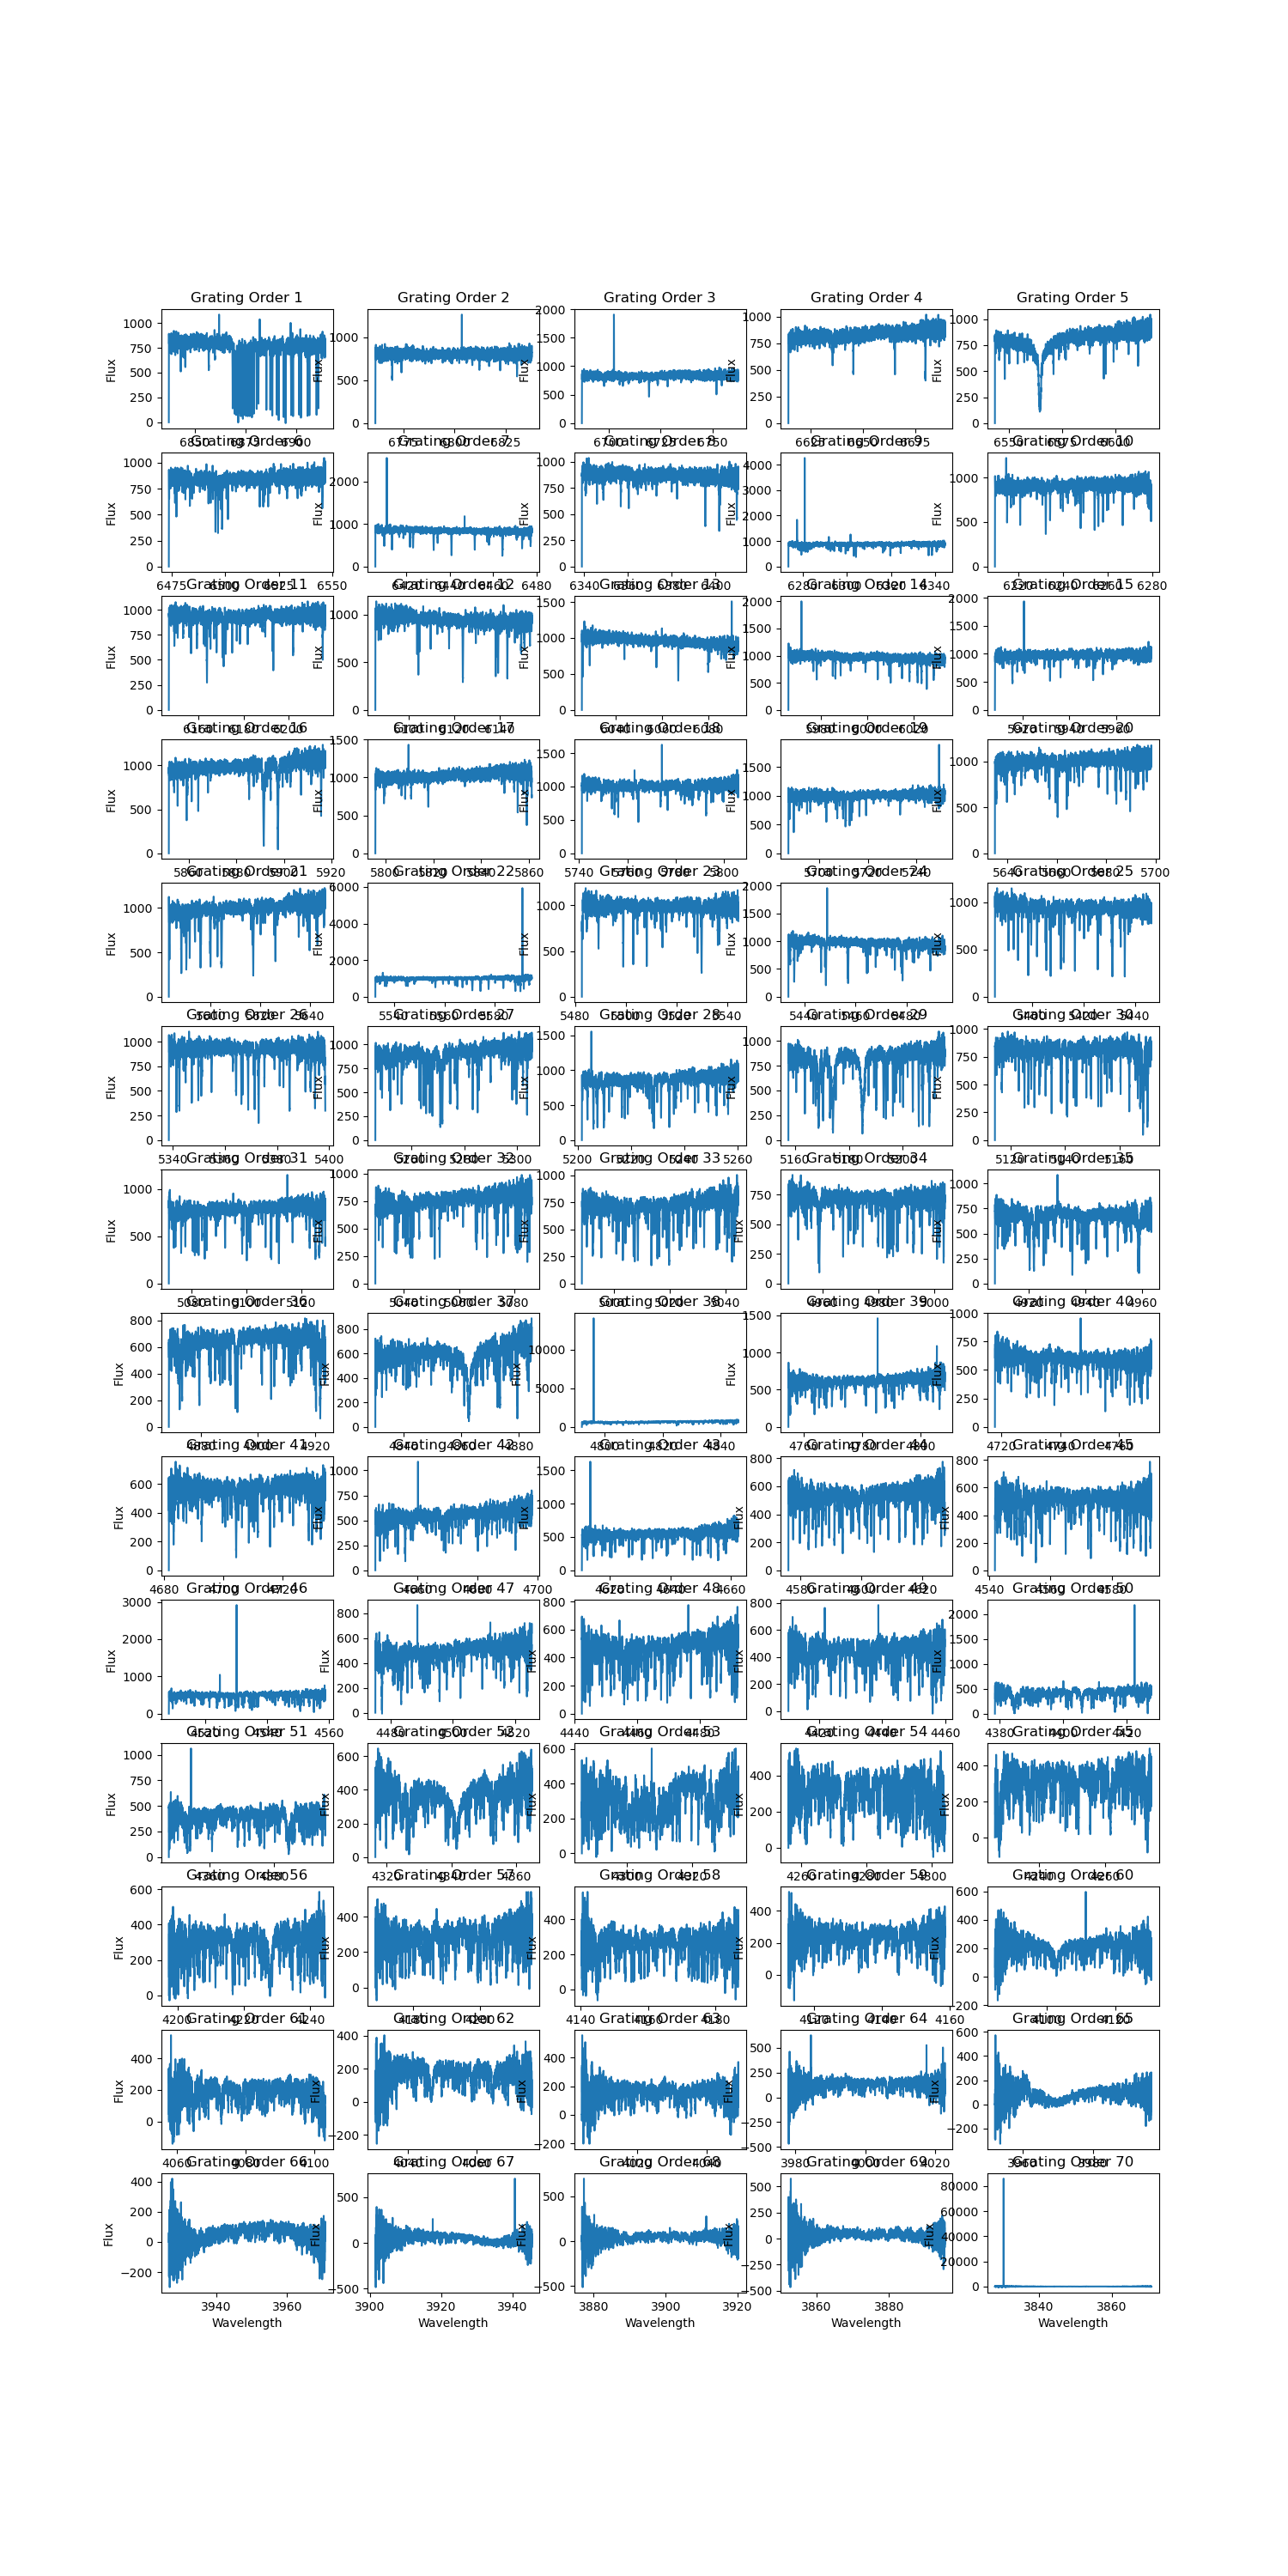

In [3]:

#example plot
#add the file you intend to show
from IPython.display import display, Image
display(Image(filename='Plots/TIC170729775/TIC1707297752021-03-14T00:09:36.136sp.png'))

    

## Analysing the Plot

There are some flux overshoots that need to be delt with. This will be taken care of by the sigma clipping and median adjustion.There are also orders where the flux is only noise around zero (especially high orders, with low wavelenghts towards UV). It does makes sense sine the star is does not have a continuum contribution there. 

## Combine and Align Spectra

In this step, we will combine and align all available spectra in the same time frame while removing artifacts that we dont want to have in the combined spectra. There are two different Methods. One is the cross-correlation. We cross correlate all spectra for a specific order and all nights together an shift them to into one reference frame. 

In [22]:
    
from funcs import align_spectra, combine_spectra
import matplotlib.pyplot as plt
from funcs import plot_arrays, query_tic_name, extract_target_info
import os
import numpy as np
from astropy.stats import sigma_clip
from astropy.io import fits
from scipy.signal import correlate, correlate2d

#Specify the spectral order to combine
combined_spectra = []
combined_wavelength = []
combined_orders = []
for i in range(70):
    #strangly - there are now some flux overshoots that should have been ruled out by sigma clipping and discarding
    order_spectrum, wavelength_sepctrum, combined_spectrum = combine_spectra(fits_files, i, sigma=5.0, blaze_corrected=True)
    combined_spectra.append(np.array(combined_spectrum))
    combined_orders.append(np.array(order_spectrum))
    combined_wavelength.append(np.array(wavelength_sepctrum))

combined_spectra = np.asarray(combined_spectra)
combined_orders = np.asarray(combined_orders)
combined_wavelength = np.asarray(combined_wavelength)


#get wavelength for plotting
spectrum = fits.getdata(fits_files[0])
flux = spectrum[1,:]
wavelength = spectrum[0,:]
blaze_corrected_flux = spectrum[3,:]
    

Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/TIC170729775_2022-01-12T05:51:00.380sp.fits in order 0 has been discarded due to significant deviation. Median value 90.0444853771538
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/TIC170729775_2022-01-12T05:51:00.380sp.fits in order 1 has been discarded due to significant deviation. Median value 97.73412925113765
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/TIC170729775_2022-01-12T05:51:00.380sp.fits in order 2 has been discarded due to significant deviation. Median value 100.11643067196502
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/TIC170729775_2022-01-12T05:51:00.380sp.fits in order 3 has been discarded due to significant deviation. Median value 102.19370234868308
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/TIC170729775_2022-01-12T05:51:00.380sp.fits in order 4 has been discarded due to significant deviation. Median value 99.41879337690027
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/

Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/TIC170729775_2022-01-12T05:51:00.380sp.fits in order 44 has been discarded due to significant deviation. Median value 36.52767152638733
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/TIC170729775_2022-01-12T05:51:00.380sp.fits in order 45 has been discarded due to significant deviation. Median value 35.354182200847916
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/TIC170729775_2022-01-12T05:51:00.380sp.fits in order 46 has been discarded due to significant deviation. Median value 34.352881868010655
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/TIC170729775_2022-01-12T05:51:00.380sp.fits in order 47 has been discarded due to significant deviation. Median value 32.49839373788028
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/TIC170729775_2022-01-12T05:51:00.380sp.fits in order 48 has been discarded due to significant deviation. Median value 29.63768111414714
Spectrum from night /home/aaron/Desktop/ZASPE/Sp

<IPython.core.display.Javascript object>


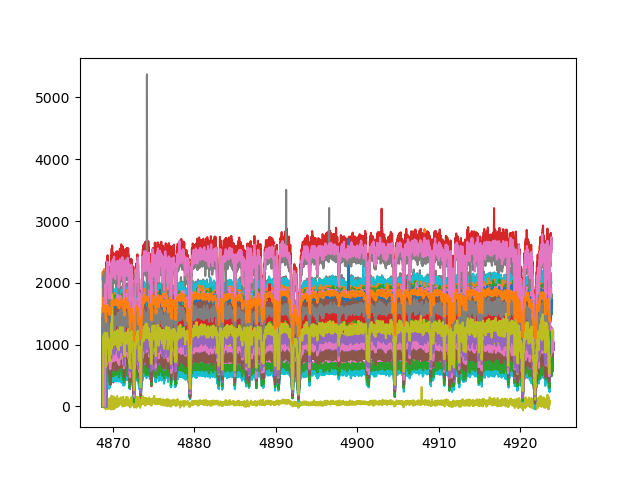

In [23]:
%matplotlib notebook

#check if correlation has worked for specific order

for_median = []
#correlation = []
reference_spectrum = None
for spectra in fits_files:
    spectrum = fits.getdata(spectra)
    wavelength = spectrum[0,:][35]
    blaze_corrected_flux = spectrum[3,:][35]
    plt.plot(wavelength,blaze_corrected_flux)
    for_median.append(blaze_corrected_flux)
    if np.all(reference_spectrum) == None:
        reference_spectrum = blaze_corrected_flux
 #   correlation.append(correlate(reference_spectrum, blaze_corrected_flux, mode='same'))
    
#print(np.median(np.asarray(for_median)))
#wavelength=spectrum[0,:]
plt.plot(spectrum[0,:][35],combined_spectra[35] +500, color = "tab:orange", label = "fit") #the spectrum is not correct
#plt.legend()

Problem with sigma clipping in the combine function. 

<IPython.core.display.Javascript object>


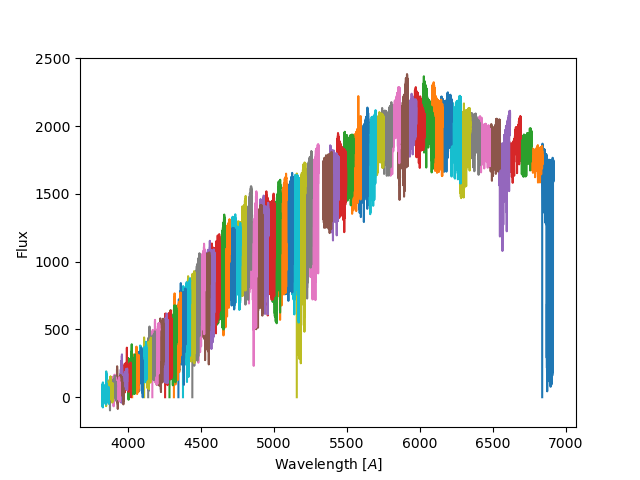

In [24]:
#get wavelength for plotting
spectrum = fits.getdata(fits_files[0])
flux = spectrum[1,:]
wavelength = spectrum[0,:]
blaze_corrected_flux = spectrum[3,:]
%matplotlib notebook 

#plot the whole spectrum of the star

import matplotlib.pyplot as plt 
plt.xlabel(r"Wavelength $[A]$")
plt.ylabel(r"Flux")
for i in range(len(wavelength)):
    #if not np.all(combined_spectra[i]) == 0:
    plt.plot(wavelength[i], combined_spectra[i])
    #plt.plot(wavelength[i], blaze_corrected_flux[i]+1000)
#plt.plot(w,f+1000)


In [17]:
from funcs import combine_spectra_interpolation 
w,f,c= combine_spectra_interpolation(wavelength,combined_spectra)
plt.plot(w,f)

ImportError: cannot import name 'combine_spectra_interpolation' from 'funcs' (/home/aaron/Desktop/Second_Earth_Target_Selection/Code/ZASPE/funcs/__init__.py)

## RV correction Method - Move spectra to rest Frame

In [19]:
import numpy as np
import glob
import os
from astropy.io import fits
from scipy import interpolate
import matplotlib.pyplot as plt
import scipy.constants as c

c_km = c.c/1000

#RV correction method 

def get_wavelength_flux_RV(filelist):
    """
    Read wavelength, flux, and RV from FITS files.

    Args:
        filelist (list): List of FITS file paths.

    Returns:
        wave (ndarray): Array of wavelength values.
        flux (ndarray): Array of flux values.
        eflux (ndarray): Array of error in flux values.
        RV (ndarray): Array of RV values.
    """
    dat, hdr = fits.getdata(filelist[0], header=True)
    wave_ref = dat[0]
    wave_ref_corr = wave_ref / (1 + hdr['RV'] / c_km)

    wave = np.zeros((len(filelist), np.shape(dat)[1], np.shape(dat)[2]), 'd')
    wave_corr = np.zeros((len(filelist), np.shape(dat)[1], np.shape(dat)[2]), 'd')
    flux = np.zeros((len(filelist), np.shape(dat)[1], np.shape(dat)[2]), 'd')
    eflux = np.zeros((len(filelist), np.shape(dat)[1], np.shape(dat)[2]), 'd')
    RV = np.zeros(len(filelist), 'd')

    for night, filename in enumerate(filelist):  #for filename in nights
        dat_aux, h_aux = fits.getdata(filename, header=True)
        wave[night] = dat_aux[0]
        #check fluxes 
        flux[night] = dat_aux[3]
        eflux[night] = dat_aux[4]
        RV[night] = h_aux['RV']
        wave_corr[ind] = wave[ind] / (1 + RV[ind] / c_km)
    
    #apply sigma clipping
    clipped_flux = sigma_clip(flux, sigma=3.0, axis=0, masked=True)
    masked_flux = clipped_flux.data
    
    #median for all orders individually over all nights 
    median = np.median(masked_flux,axis=[0])
    mask = clipped_flux.mask
    print(np.shape(median))
    #where mask is true, set equal to median
    spectrum_updated = np.where(mask, median, masked_flux)

    #exclude nights that are well outside the median range (zero nights)
    #median_night = np.median(spectrum_updated, axis=2)
    #print(np.shape(median_night))
    #dev_threshold_low = 0.2 * median_night
    #dev_threshold_high = 5.0 * median_night

    # Create mask for nights to be discarded/ Iam not sure if that is correct
    #discard_mask = (median_night < dev_threshold_low) | (median_night > dev_threshold_high)
    #print(discard_mask)
    # Apply the discard mask to all relevant arrays
    #wave = wave[~discard_mask]
    #flux = flux[~discard_mask]
    #eflux = eflux[~discard_mask]
    #RV = RV[~discard_mask]
    #wave_corr = wave_corr[~discard_mask]
            
    spectrum_updated = flux
    
    return wave, spectrum_updated, eflux, RV, wave_corr, median

from astropy.stats import sigma_clip

def get_wavelength_flux_RV(filelist, sigma=2.0):
    """
    Read wavelength, flux, and RV from FITS files and apply sigma clipping.

    Args:
        filelist (list): List of FITS file paths.
        sigma (float): Sigma value for sigma clipping. If None, no sigma clipping will be applied.

    Returns:
        wave (ndarray): Array of wavelength values.
        flux (ndarray): Array of flux values after sigma clipping.
        eflux (ndarray): Array of error in flux values.
        RV (ndarray): Array of RV values.
        wave_corr (ndarray): Array of corrected wavelength values.
        median (ndarray): Array of median flux values.
    """
    dat, hdr = fits.getdata(filelist[0], header=True)
    wave_ref = dat[0]
    wave_ref_corr = wave_ref / (1 + hdr['RV'] / c_km)
    num_orders = np.shape(dat)[1]

    wave = np.zeros((len(filelist), np.shape(dat)[1], np.shape(dat)[2]), 'd')
    wave_corr = np.zeros((len(filelist), np.shape(dat)[1], np.shape(dat)[2]), 'd')
    #np full rather than zeros otherwise after shift first value is zero!
    flux = np.full((len(filelist), num_orders, np.shape(dat)[2]), np.nan, dtype='d')
    eflux = np.zeros((len(filelist), np.shape(dat)[1], np.shape(dat)[2]), 'd')
    RV = np.zeros(len(filelist), 'd')
    median = np.zeros((len(filelist), np.shape(dat)[1]), 'd')

    for night, filename in enumerate(filelist):
        dat_aux, h_aux = fits.getdata(filename, header=True)
        wave[night] = dat_aux[0]
        flux[night] = dat_aux[3]
        eflux[night] = dat_aux[4]
        RV[night] = h_aux['RV']
        wave_corr[night] = wave[night] / (1 + RV[night] / c_km)
        

        # Apply sigma clipping to flux data
        if sigma is not None:
            clip_mask = sigma_clip(flux[night], sigma_lower=sigma, sigma_upper=sigma, masked=True)
            clipped_flux = clip_mask.data
            median_night = np.median(clipped_flux)
            flux[night][clip_mask.mask] = median_night
            
    # Exclude nights with non-contributing flux for each order
    for order in range(num_orders):
        order_median = np.median(flux[:, order])

        for night in range(len(filelist)):
            night_median = np.median(flux[night, order])

            dev_threshold_low = 0.2 * order_median
            dev_threshold_high = 5.0 * order_median

            if night_median < dev_threshold_low or night_median > dev_threshold_high:
                print(f"Night {night} in Order {order} has been discarded due to non-contributing flux.")
                flux[night, order] = order_median


    return wave, flux, eflux, RV, wave_corr, median





import numpy as np
from astropy.io import fits
from astropy.stats import sigma_clip



def save_spectrum_as_text(order, wave_ref_corr, flux_median, output_filename):
    """
    Save the spectrum as a text file.

    Args:
        order (ndarray): Array of order values.
        wave_ref_corr (ndarray): Corrected reference wavelength values.
        flux_median (ndarray): Median flux values.
        output_filename (str): Output text file name.
    """
    np.savetxt(output_filename, np.column_stack((np.ravel(order), np.ravel(wave_ref_corr), np.ravel(flux_median))), delimiter=' ')


def save_spectrum_as_fits(wave_ref_corr, flux_median, input_filename, output_filename):
    """
    Save the spectrum as a FITS file.

    Args:
        wave_ref_corr (ndarray): Corrected reference wavelength values.
        flux_median (ndarray): Median flux values.
        input_filename (str): Input FITS file name.
        output_filename (str): Output FITS file name.
    """
    dat, hdr = fits.getdata(input_filename, header=True)
    dat[0] = wave_ref_corr
    dat[1] = flux_median
    fits.writeto(output_filename, dat, hdr, overwrite=True)


Night 18 in Order 0 has been discarded due to non-contributing flux.
Night 18 in Order 1 has been discarded due to non-contributing flux.
Night 18 in Order 2 has been discarded due to non-contributing flux.
Night 18 in Order 3 has been discarded due to non-contributing flux.
Night 18 in Order 4 has been discarded due to non-contributing flux.
Night 18 in Order 5 has been discarded due to non-contributing flux.
Night 18 in Order 6 has been discarded due to non-contributing flux.
Night 18 in Order 7 has been discarded due to non-contributing flux.
Night 18 in Order 8 has been discarded due to non-contributing flux.
Night 18 in Order 9 has been discarded due to non-contributing flux.
Night 18 in Order 10 has been discarded due to non-contributing flux.
Night 18 in Order 11 has been discarded due to non-contributing flux.
Night 18 in Order 12 has been discarded due to non-contributing flux.
Night 18 in Order 13 has been discarded due to non-contributing flux.
Night 18 in Order 14 has been 

<IPython.core.display.Javascript object>


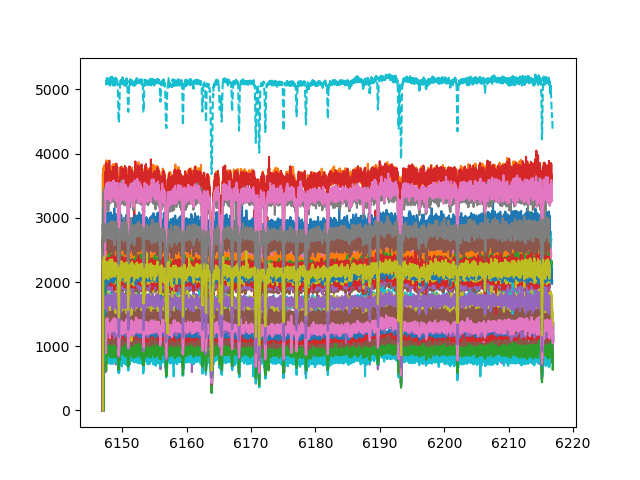

In [28]:
%matplotlib notebook
from funcs import plot_fluxes, plot_median_spectrum, interpolate_flux

#get fit files
filelist = fits_files

#get observed wavelength, flux and eflux; extract RV and calculate corrected wavelength
wave, flux, eflux, RV, wave_corr, median = get_wavelength_flux_RV(filelist)
#get reference wavelength from first observation night 
wave_ref_corr = wave[0] / (1 + RV[0] / c_km) 
flux_interp = interpolate_flux(wave, flux, wave_ref_corr, RV)
#median flux for specific order
flux_median = np.median(flux_interp, axis=0)
#zero at beginning
plot_fluxes(wave_corr, flux, 10) #controll 
plot_median_spectrum(wave_ref_corr, flux_median+3000, 10) #controll
#i need to define the order array above somewhere
save_spectrum_as_text(combined_orders, wave_ref_corr, flux_median, star_name+'txt')
#save_spectrum_as_fits(wave_ref_corr, flux_median, filelist[0], 'TOI-199_coadd_FEROS.fits')


<IPython.core.display.Javascript object>


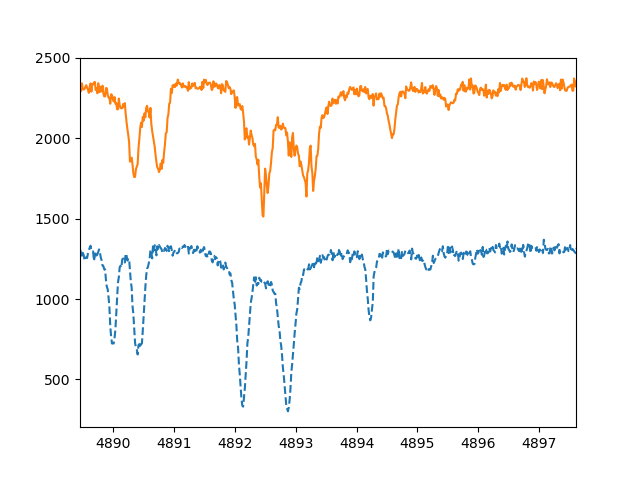

In [36]:
#comparison between both methods

plt.plot(spectrum[0,:][35],combined_spectra[35] +1000, color = "tab:orange", label = "fit")
#plot_median_spectrum(wave_ref_corr, np.median(flux,axis=0), 35) #controll
plot_median_spectrum(wave_ref_corr, flux_median, 35) #controll
#plot_median_spectrum(wave_ref_corr, flux_median+1000, 35) #controll

In [30]:
lambda_ref = 4894.633
lambda_obs  = 4894.582
delta_lambda = lambda_ref - lambda_obs

delta_lambda/lambda_ref * c_km 

3.1237102675201487

In [31]:
# That looks very very good!!

In [30]:
def plot_fluxes_ref(wave_ref_corr, flux, order):
    """
    Plot the fluxes for each order.

    Args:
        wave_corr (ndarray): Array of corrected wavelength values.
        flux (ndarray): Array of flux values.
        order to plot
    """
    num_nights = flux.shape[0]
    num_orders = wave_corr.shape[0]
    num_pixels = wave_corr.shape[1]

    plt.figure()
    for i in range(num_nights):
        x = wave_ref_corr[order]
        y = flux[i][order]
        plt.plot(x, y)
    plt.show()

In [10]:
np.shape(wave_corr)

(49, 70, 4096)

In [5]:
np.shape(flux_interp)

(49, 70, 4096)

In [111]:
array = combined_wavelength, combined_spectra
#stacked_array = np.column_stack([combined_orders,combined_wavelength])

#reshaped_array = stacked_array.reshape(-1, 4096)

#np.shape(reshaped_array)

In [33]:
def store_spectrum_orders(wavelength_spec, spectrum, save_dir=None, file_name=None):
    num_orders = np.shape(wavelength_spec)[0]  # Number of spectral orders

    # Combine all orders into a single array
    data = np.empty((0, 3))
    for order_idx in range(num_orders):
        # Get the wavelength and flux values for the current order
        wavelength = wavelength_spec[order_idx]
        flux = spectrum[order_idx]
        #print(np.shape(wavelength),np.shape(flux),order_idx)
        # Combine order index, wavelength, and flux into a single array
        order_data = np.column_stack((np.full_like(wavelength, order_idx), wavelength, flux))

        # Append order data to the main data array
        data = np.concatenate((data, order_data), axis=0)

    # Define the file path and name for all orders
    file_path = os.path.join(save_dir, file_name)

    # Create the directory if it does not exist
    os.makedirs(os.path.dirname(file_path), exist_ok=True)

    # Save the data to the text file
    np.savetxt(file_path, data, delimiter="\t")

    print(f"The spectrum for all orders has been stored in the file: {file_path}")

In [34]:
#from funcs import store_spectrum_orders
save_dir = "Spectra/"
    
file_name = star_name + ".txt"

store_spectrum_orders(combined_wavelength,combined_spectra, save_dir = save_dir, file_name = file_name )

The spectrum for all orders has been stored in the file: Spectra/TIC170729775.txt
